In [23]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

- Зібрати дані опитування

In [2]:
# зібрати всі дані в df
df_bus_stantion = pd.read_csv("./data/Bus Stantion + Park_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #bus stanion
df_central_square = pd.read_csv("./data/Central square_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #central square
df_linkedin = pd.read_csv("./data/Lkdn_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #linkedin
df_social_media = pd.read_csv("./data/Володимир Медіа_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #internet
df_kogorta = pd.read_csv("./data/Когорта_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #individual groups

- Функція упорядкування даних

In [3]:
def add_origin_column(df, column_name):
    df["origin"] = column_name
    df = df.rename(
        columns={
            "Стать респондента": "sex", 
            "Рік народження": "age",
            "Скільки часу ви проживаєте у місті Володимир": "нears_lived",
            "Ваш рід занять": "occupation",
            "Рівень доходу": "sallary",
            "Яку частину доходу ви витрачаєте на діяльсть пов'язану з туризмом та сферою обслуговування ": "Income_spent_on_tourism",
            "Як ви ставитесь до візитів хасидів до Володимира?": "hasidic_loyalty",
            "Як ви ставитесь до туристів з Польщі?": "polish_loyalty",
            "Як ви ставитесь до туристів з інших країн?":"other_loyalty",
            "На вашу думку який у вас рівень володіння англійською мовою?":"english_level",
            "На вашу думку який у вас рівень володіння польською мовою?":"polish_level",
            "Чи достатньо, на вашу думку, у Володимирі готелей, для розміщення туристів чи туристичних груп?":"holels_sits",
            "Чи достатньо, на вашу думку, у Володимирі закладів харчування?":"caffee_sits",
            "Чи вважаєте ви, що Володимир достатньо представлений в інтернеті як туристичне місто?":"internet_representation",
            " Які туристичні об’єкти у Володимирі є, на вашу думку, ключовими для приваблення туристів?":"key_items",
            "Які зміни в туристичній інфраструктурі ви вважаєте найбільш необхідними? (можна кілька варіантів)":"key_changes",
            "Які об’єкти, на вашу думку, слід відкрити чи розвинути у Володимирі, щоб туристи залишалися довше? (можна кілька варіантів)":"tourism_development",    
            "Як ви ставитесь до візитів хасидів до Володимира?\n\nцього читати респондентам не потрібно (Карлін-столінські хасиди, вшановують пам’ять свого цадика (духовного провідника) Шломо Готліба Карлінера, який помер у 1792 році і похований на колишньому єврейському цвинтарі, нині це паркова зона в районі вулиці Драгоманова)  " : "hasidic_loyalty2"       
            })
    return df

- додати необхідні колонки

In [11]:
# прогнати дані через функцію нормалізації
df_bus_stantion = add_origin_column(df_bus_stantion, "bus stantion")
df_central_square = add_origin_column(df_central_square, "central_square")
df_linkedin = add_origin_column(df_linkedin, "linkedin")
df_social_media = add_origin_column(df_social_media, "social media")
df_kogorta = add_origin_column(df_kogorta, "test group")

# одбєднати дані в спільний dataframe
df_union =  pd.concat([df_bus_stantion, df_central_square, df_linkedin, df_social_media, df_kogorta], axis=0, ignore_index=True)
df_union["hasidic_loyalty_total"] = df_union["hasidic_loyalty"].fillna(df_union["hasidic_loyalty2"])

df_union.groupby('sex')


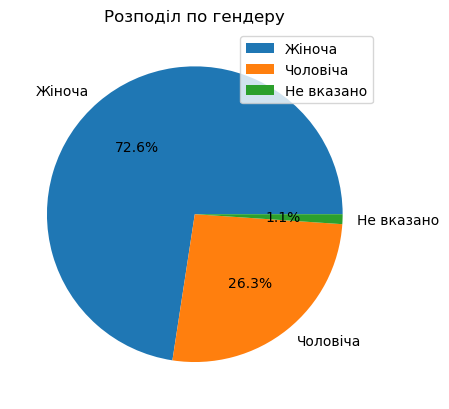

In [47]:
counts = df_union['sex'].fillna("Не вказано").value_counts(dropna=False)

ax = counts.plot(
    kind='pie',
    autopct='%1.1f%%',   
    ylabel='',           
    legend=True         
)

ax.set_title('Розподіл по гендеру')

plt.show()